In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt # data visualization
from wordcloud import WordCloud
from datetime import date

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Reading Data

In [37]:
df = pd.read_csv("../input/netflix-userbase-dataset/Netflix Userbase.csv")
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


# Questions

## General questions
### 1. Find number of males and females?
### 2. What devices are used the most by users?
### 3. Which are the most comman plans subscribed by users?
### 4. Find the number of users joined Netflix by year?
### 5. What devices are used by which plans?

## Countries related questions
### 1. Find number of users by countries?
### 2. Find number of males and females by countries?
### 3. which devices are used by each countries?
### 4. Which plans are most used by each country?

## Revenue related questions
### 1. Find the total revenue of 2022?
### 2. Find total revenue of 2022 by gender?
### 3. Find total revenue of 2022 by each country?
### 4. Find total revenue of 2022 by Subscription Type (Plan)?
### 5. Find total revenue of 2022 by devices (Laptop, Smartphones, Tablet etc)?

## Age related questions
### 1. Find the number of user age wise?
### 2. What are the subscription type by age?

## Data Cleaning and Manipulation

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [39]:
df.columns

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

In [40]:
df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [41]:
#print(df['Join Date'].dtype)   # Join Date is a object, we need to convert it into DateTime Type
df['Join Date'] = pd.to_datetime(df['Join Date'])
#print(df['Join Date'].dtype)
df['Join Year'] = df['Join Date'].dt.year

## Number of males and females

Female    1257
Male      1243
Name: Gender, dtype: int64


([<matplotlib.patches.Wedge at 0x7e1cd87c29e0>,
 [Text(-0.009675938404905706, 1.0999574429113086, 'Female'),
  Text(0.009675938404905327, -1.0999574429113086, 'Male')],
 [Text(-0.005277784584494021, 0.5999767870425319, '50.3%'),
  Text(0.005277784584493813, -0.5999767870425319, '49.7%')])

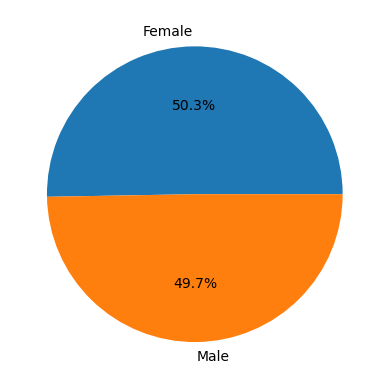

In [42]:
df.head()

#totalFemales = sum(df['Gender']=="Female")
#totalMales = list(df['Gender']).count('Male')
#totalFemales = df['Gender'].value_counts()['Female']
gender = df['Gender'].value_counts()
print(gender)
plt.pie(gender.values, labels = gender.index, autopct='%1.1f%%')
    

## What devices are used the most by users?

Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: Device, dtype: int64


Text(0, 0.5, 'Number of device')

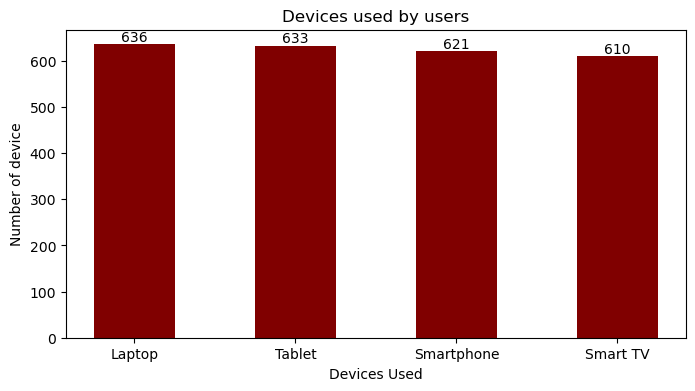

In [43]:
df.head()
deviceUsed = df.Device.value_counts()
print(deviceUsed)

plt.figure(figsize=(8,4))
plt.title("Devices used by users")
plt.bar_label(plt.bar(deviceUsed.index, deviceUsed.values, width = 0.5, color = "maroon"))
plt.xlabel("Devices Used")
plt.ylabel("Number of device")

## Which are the most comman plans subscribed by users?

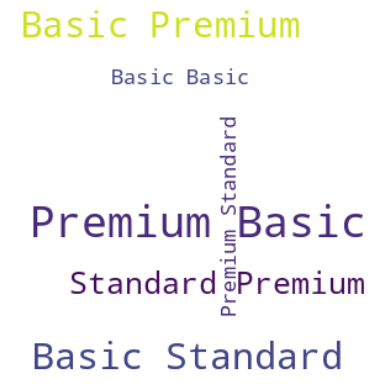

In [44]:
text = df["Subscription Type"].to_string(index = "False")
#print(text)
wc = WordCloud(width = 300, height = 300, background_color = "white")
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

plt.show()


## Number of users joined Netflix by year

[Text(0, 0, '14'), Text(0, 0, '2448'), Text(0, 0, '38')]

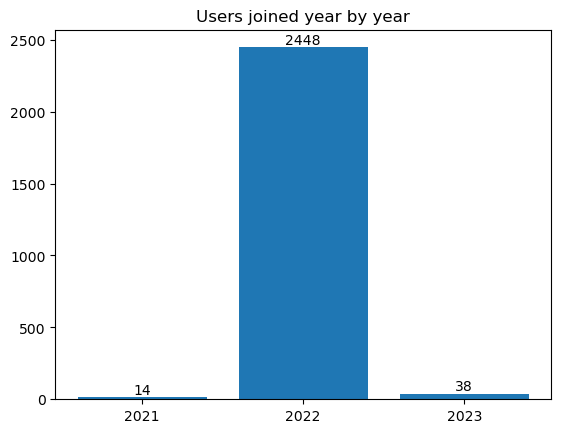

In [45]:
df.head()
joined = df['Join Year'].value_counts().sort_index()

plt.title("Users joined year by year")
b = plt.bar(['2021', '2022', '2023'], joined.values)
plt.bar_label(b)

## Devices with plans

  Subscription Type  Smartphone  Smart TV  Laptop  Tablet
0             Basic         251       238     259     251
1           Premium         171       188     192     182
2          Standard         199       184     185     200


<Axes: title={'center': 'Devices with Subscription Type'}, xlabel='Subscription Type'>

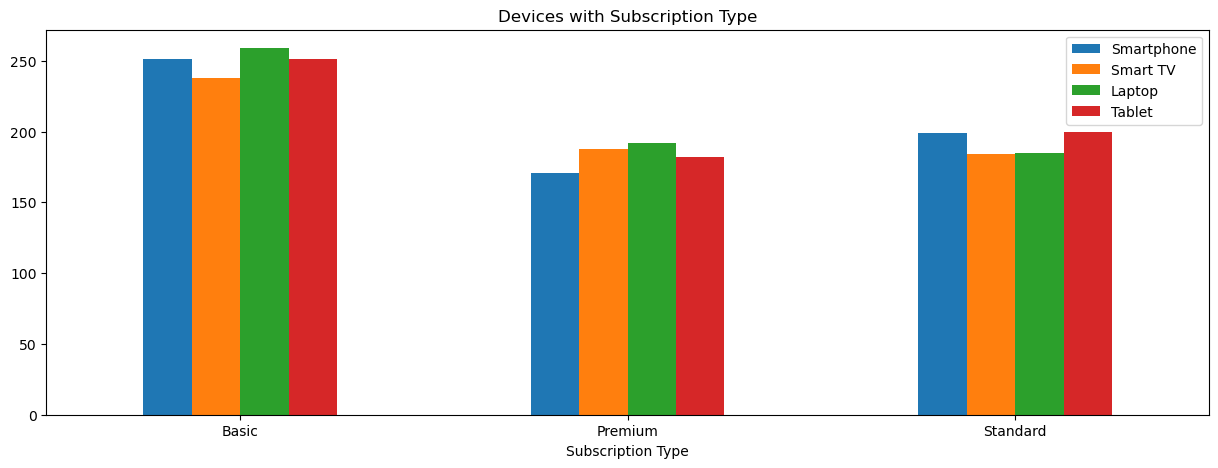

In [46]:
df.head()

planGroup = df.groupby(['Subscription Type'])
lst = []
for p in df['Subscription Type'].unique():
    smartphoneCount = planGroup.get_group(p).Device.value_counts()['Smartphone']
    tvCount = planGroup.get_group(p).Device.value_counts()['Smart TV']
    laptopCount = planGroup.get_group(p).Device.value_counts()['Laptop']
    tabletCount = planGroup.get_group(p).Device.value_counts()['Tablet']


    dic = {'Subscription Type': p, 'Smartphone': smartphoneCount, 'Smart TV': tvCount ,'Laptop': laptopCount, 'Tablet': tabletCount}
    lst.append(dic)
    
newDF = pd.DataFrame.from_dict(lst)
print(newDF)

newDF.plot.bar(x = "Subscription Type", y = ["Smartphone",  "Smart TV",  "Laptop",  "Tablet"], title='Devices with Subscription Type', figsize=(15, 5), rot = 0)

# Analysis by countries

## Countries with number of users

United States     451
Spain             451
Canada            317
United Kingdom    183
Australia         183
Germany           183
France            183
Brazil            183
Mexico            183
Italy             183
Name: Country, dtype: int64


Text(0, 0.5, 'Number of users')

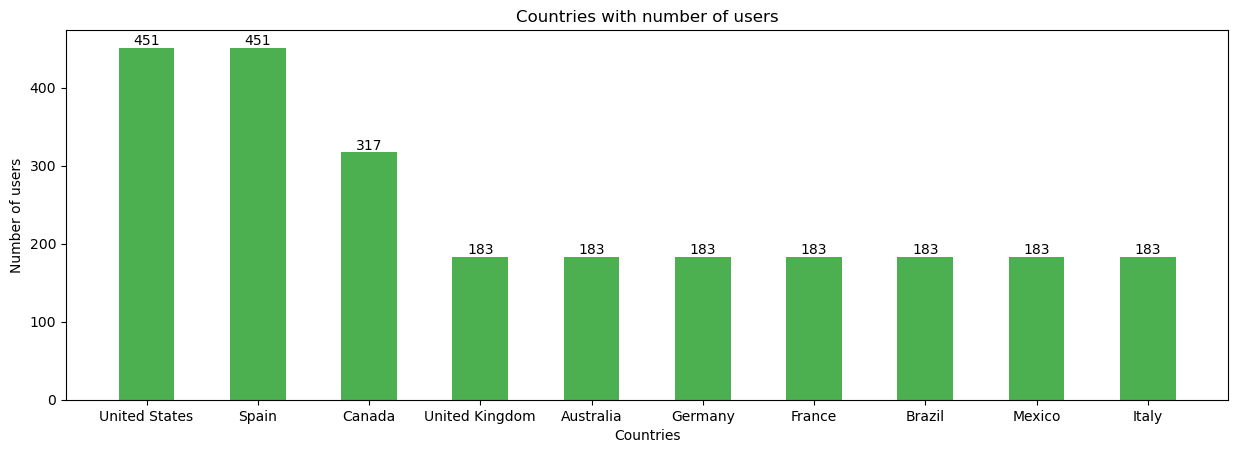

In [47]:
countries = df["Country"].value_counts()
print(countries)
plt.figure().set_figwidth(15)
plt.title("Countries with number of users")
plt.bar_label(plt.bar(countries.index, countries.values, color = "#4CAF50", width=0.5))
plt.xlabel('Countries')
plt.ylabel('Number of users')

## Number of males and females by countries

          Country  Males  Females
0   United States    226      225
1          Canada    160      157
2  United Kingdom     90       93
3       Australia     94       89
4         Germany     89       94
5          France     92       91
6          Brazil     88       95
7          Mexico     94       89
8           Spain    218      233
9           Italy     92       91


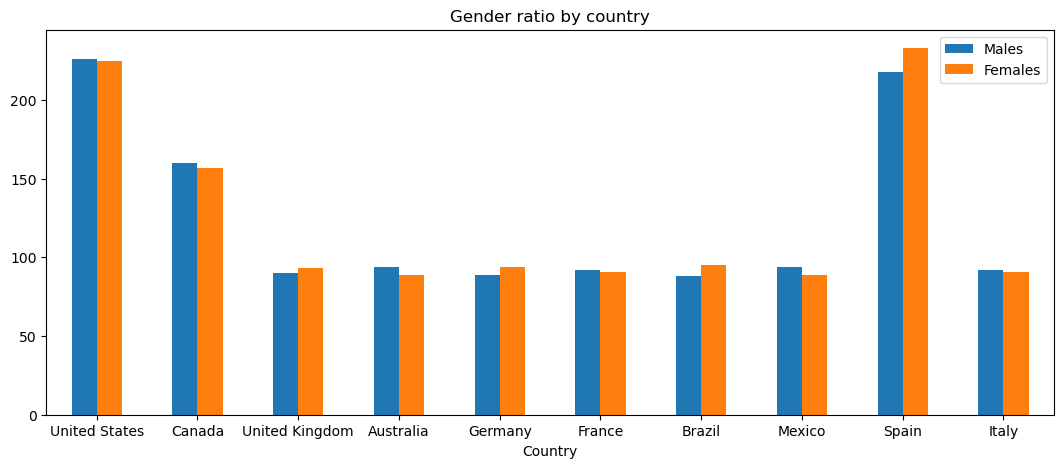

In [48]:
df.head()
countryGroup = df.groupby(['Country'])
lst = []
for countries in df.Country.unique():
    femaleCount = countryGroup.get_group(countries).Gender.value_counts()['Female']
    maleCount = countryGroup.get_group(countries).Gender.value_counts()['Male']

    dic = {'Country': countries, 'Males': maleCount, 'Females': femaleCount}
    lst.append(dic)
    
newDF = pd.DataFrame.from_dict(lst)
print(newDF)
#plt.bar(newDF.Country, newDF.Males, color = "#4CAF50", width=0.5)
ax = newDF.plot(x = "Country", y=["Males", "Females"], kind="bar", title="Gender ratio by country",  figsize=(13, 5), rot=0)

## Devices by countries

          Country  Smartphone  Laptop  SmartTV  Tablet
0   United States          99     121      116     115
1          Canada          80      64       78      95
2  United Kingdom          54      44       40      45
3       Australia          55      47       38      43
4         Germany          36      63       42      42
5          France          47      52       43      41
6          Brazil          55      44       40      44
7          Mexico          46      44       41      52
8           Spain         102     107      126     116
9           Italy          47      50       46      40


<Axes: title={'center': 'Devices used by countries'}, xlabel='Country'>

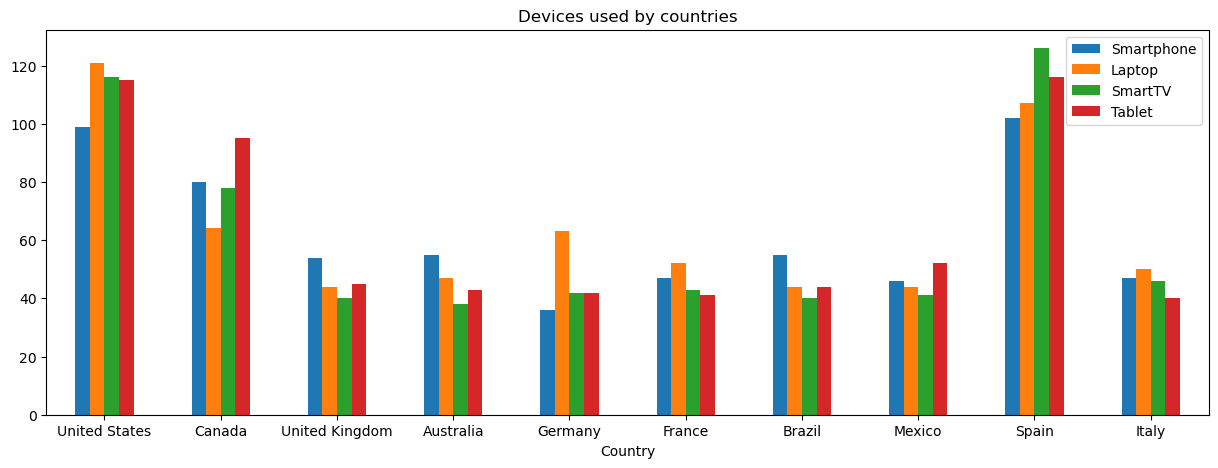

In [49]:
df.head()
countryGroup = df.groupby(['Country'])
lst = []
for countries in df.Country.unique():
    smartphoneCount = countryGroup.get_group(countries).Device.value_counts()['Smartphone']
    laptopCount = countryGroup.get_group(countries).Device.value_counts()['Laptop']
    smartTVCount = countryGroup.get_group(countries).Device.value_counts()['Smart TV']
    tabletCount = countryGroup.get_group(countries).Device.value_counts()['Tablet']
     
    dic = {'Country': countries, 'Smartphone': smartphoneCount, 'Laptop': laptopCount, 'SmartTV': smartTVCount, 'Tablet': tabletCount}
    lst.append(dic)
newDF = pd.DataFrame.from_dict(lst)
print(newDF)

newDF.plot.bar(x = "Country", y = ["Smartphone",  "Laptop",  "SmartTV",  "Tablet"], title="Devices used by countries", figsize=(15, 5), rot=0)

## Which plans are most used by each country?

          Country  Basic  Premium  Standard
0   United States    199      145       107
1          Canada    145       88        84
2  United Kingdom      3        0       180
3       Australia     31      101        51
4         Germany    149        3        31
5          France     36      147         0
6          Brazil    146       33         4
7          Mexico      4        0       179
8           Spain    110      212       129
9           Italy    176        4         3


<Axes: title={'center': 'Countries with subscription type'}, xlabel='Country'>

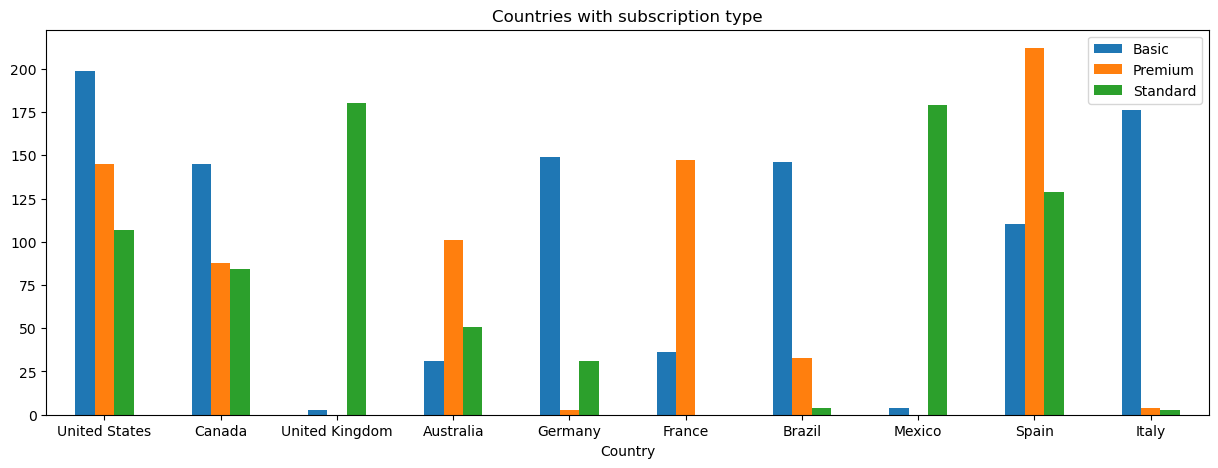

In [50]:
df.head()
countryGroup = df.groupby('Country')
lst = []
#print(df['Subscription Type'].unique())

for c in df.Country.unique():
    try:
        basic = countryGroup.get_group(c)['Subscription Type'].value_counts()["Basic"]
    except:
        basic = 0
    try:
        standard = countryGroup.get_group(c)['Subscription Type'].value_counts()["Standard"]
    except:
        standard = 0
    try:
        premium = countryGroup.get_group(c)['Subscription Type'].value_counts()["Premium"]
    except:
        premium = 0
        
    dic = {'Country': c, 'Basic': basic, 'Premium': premium, 'Standard': standard}       
    lst.append(dic)

newDF = pd.DataFrame.from_dict(lst)
print(newDF)

newDF.plot.bar(x = "Country", y = ["Basic", "Premium", "Standard"], rot=0, title = "Countries with subscription type", figsize=(15,5))


# Revenue

## Total revenue of 2022

In [51]:
df.head()

df['Join Year'] = df['Join Date'].dt.year

df.loc[df['Join Year'] < 2022, 'Amount paid in 2022'] = 12 * df['Monthly Revenue']
df.loc[df['Join Year'] == 2022, 'Amount paid in 2022'] =  (round((pd.to_datetime('2022-12-31') - df['Join Date']).dt.days * 0.03285, 0)) * df['Monthly Revenue']
df.loc[df['Join Year'] > 2022, 'Amount paid in 2022'] = 0

df.head(20)
df['Amount paid in 2022'].sum()

160837.0

## Revenue of 2022 by gender

80213.0
80624.0


Text(0, 0.5, 'Total revenue')

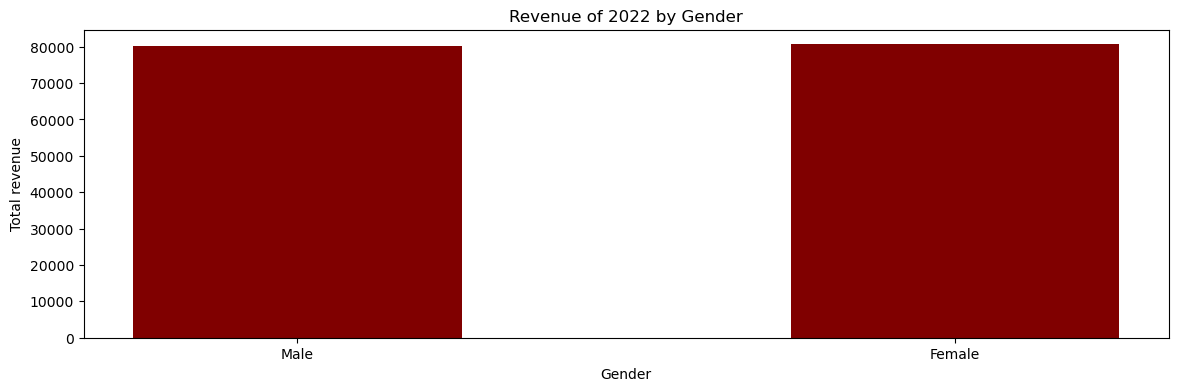

In [52]:
revenueMale = df[df['Gender'] == "Male"]['Amount paid in 2022'].sum()
print(revenueMale)
revenueFemale = df[df['Gender'] == "Female"]['Amount paid in 2022'].sum()
print(revenueFemale)

plt.figure(figsize=(14,4))

plt.title("Revenue of 2022 by Gender")
plt.bar(['Male', 'Female'], [revenueMale, revenueFemale], width = 0.5, color = "maroon")
plt.xlabel('Gender')
plt.ylabel('Total revenue')

## Revenue of 2022 by each country

          Country  Total Revenue
0   United States        29467.0
8           Spain        27920.0
1          Canada        19855.0
2  United Kingdom        12551.0
3       Australia        12423.0
5          France        12292.0
4         Germany        11809.0
6          Brazil        11551.0
9           Italy        11522.0
7          Mexico        11447.0


Text(0, 0.5, 'Total revenue')

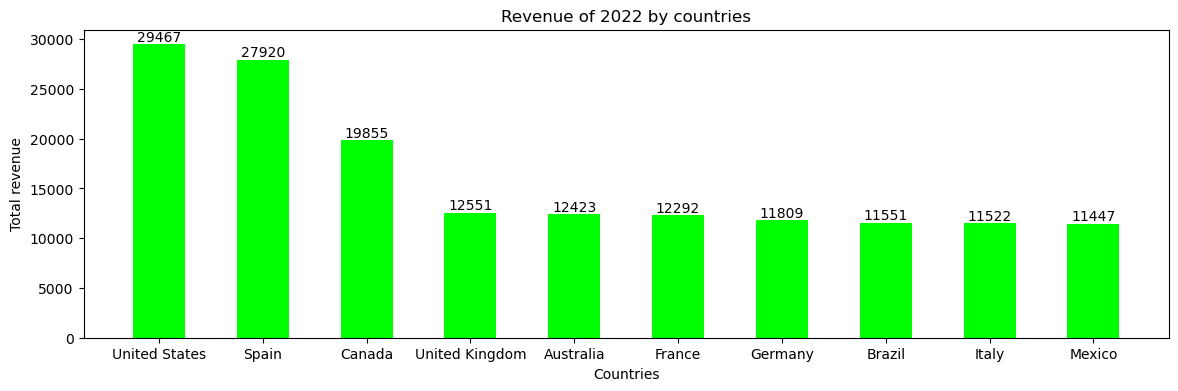

In [53]:
lst = []
for c in df.Country.unique():
    total = df[df['Country'] == c]['Amount paid in 2022'].sum()
    dic = {"Country": c, "Total Revenue": total}
    lst.append(dic)
    
newDf = pd.DataFrame().from_dict(lst)
newDf = newDf.sort_values(by=['Total Revenue'], ascending=False)
print(newDf)
plt.figure(figsize=(14,4))
plt.title("Revenue of 2022 by countries")
plt.bar_label(plt.bar(newDf["Country"], newDf["Total Revenue"], width = 0.5, color = "lime"))
plt.xlabel('Countries')
plt.ylabel('Total revenue')

## Total revenue of 2022 by Subscription Type (Plan)

Text(0, 0.5, 'Revenue')

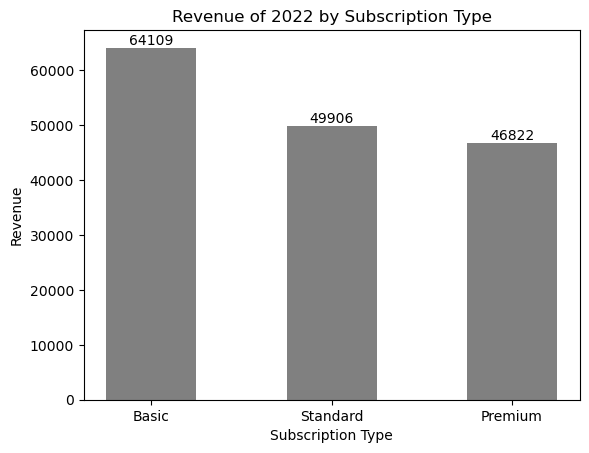

In [54]:
df.head()
countriesGroup = df.groupby(['Subscription Type'])
basicSum = df[df['Subscription Type'] == "Basic"]["Amount paid in 2022"].sum()
standardSum = df[df['Subscription Type'] == "Standard"]["Amount paid in 2022"].sum()
premiumSum = df[df['Subscription Type'] == "Premium"]["Amount paid in 2022"].sum()

plt.title("Revenue of 2022 by Subscription Type")
plt.bar_label(plt.bar(['Basic', 'Standard', 'Premium'], [basicSum, standardSum, premiumSum], width = 0.5, color = "Grey"))
plt.xlabel("Subscription Type")
plt.ylabel("Revenue")

## Total revenue of 2022 by devices (Laptop, Smartphones, Tablet etc)

Text(0, 0.5, 'Number of devices')

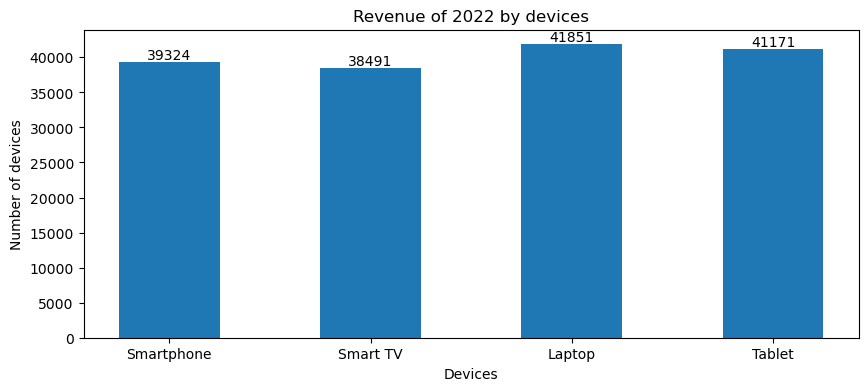

In [55]:
df.head()
smartPhoneRevenue = df[df['Device'] == 'Smartphone']["Amount paid in 2022"].sum()
smartTVRevenue = df[df['Device'] == 'Smart TV']["Amount paid in 2022"].sum()
laptopRevenue = df[df['Device'] == 'Laptop']["Amount paid in 2022"].sum()
tabletRevenue = df[df['Device'] == 'Tablet']["Amount paid in 2022"].sum()

plt.figure(figsize=(10,4))
plt.title("Revenue of 2022 by devices")
plt.bar_label(plt.bar(['Smartphone', 'Smart TV', 'Laptop', 'Tablet'], [smartPhoneRevenue, smartTVRevenue, laptopRevenue, tabletRevenue], width = 0.5))
plt.xlabel("Devices")
plt.ylabel("Number of devices")

# Age wise analysis

## Number of user age wise

Text(0, 0.5, 'Number of users')

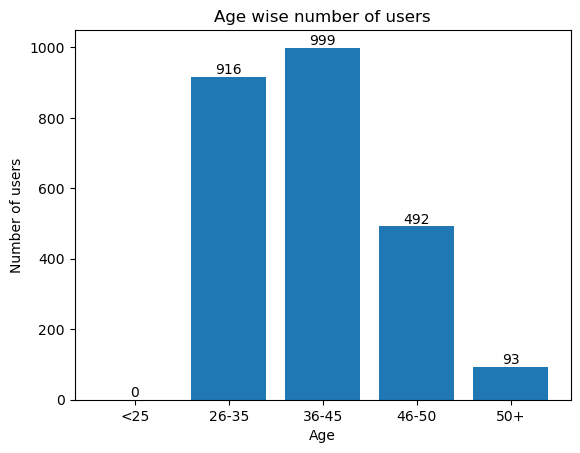

In [56]:
df.head()
less25 = len(df[(df['Age'] >= 18) & (df['Age']<= 25)])
range26_35 =  len(df[(df['Age'] >= 26) & (df['Age']<= 35)])
range36_45 = len(df[(df['Age'] >= 36) & (df['Age']<= 45)]['Age'])
range46_50 = len(df[(df['Age'] >= 46) & (df['Age']<= 50)]['Age'])
greater50 = len(df[(df['Age'] >= 51)]['Age'])

plt.bar_label(plt.bar(["<25", "26-35", "36-45" , "46-50", "50+"], [less25, range26_35, range36_45 , range46_50, greater50]))
plt.xlabel("Age")
plt.title("Age wise number of users")
plt.ylabel("Number of users")

## Subscription type by age

     Age  Basic  Premium  Standard
0  26-30    171      135       117
1  31-35    183      150       160
2  36-40    223      139       152
3  41-45    182      140       163
4  46-50    207      142       143
5  51-80     33       27        33


<Axes: title={'center': 'Age wise Subscription Type'}, xlabel='Age'>

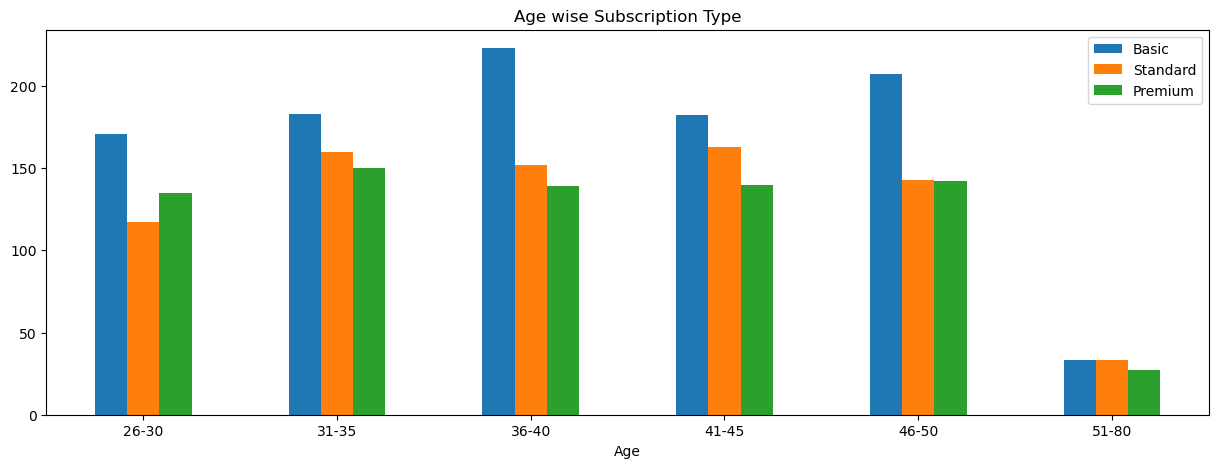

In [57]:
df.head()
lst = []
ageRange = [[26,30], [31,35], [36,40], [41,45] , [46,50], [51,80]]
for ar in ageRange:
    basic = len(df[(df['Age'] >= ar[0]) & (df['Age']<= ar[1]) & (df['Subscription Type'] == "Basic")])
    standard = len(df[(df['Age'] >= ar[0]) & (df['Age']<= ar[1]) & (df['Subscription Type'] == "Standard")])
    premium = len(df[(df['Age'] >= ar[0]) & (df['Age']<= ar[1]) & (df['Subscription Type'] == "Premium")])

    dic = {'Age': str(ar[0]) + '-' + str(ar[1]), "Basic": basic, "Premium": premium, "Standard": standard}
    lst.append(dic)
    
newDF = pd.DataFrame.from_dict(lst)
print(newDF)


newDF.plot.bar( x = "Age", y = ["Basic", "Standard", "Premium"], figsize=(15,5), rot = 0, title = "Age wise Subscription Type")